In [53]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

Primero diseñaremos un tipo de objeto que represente tipos de atributos de un dataset (enteros, strings y booleanos). La La clase se llamará `Attribute`.

In [1]:
class Attribute:
    def __init__(self, name, dtype, values=None, shape=None, ground_truth=None):
        self.name = name
        self.dtype = dtype
        self.values = np.array(values) if values else None
        self.shape = shape
        self.ground_truth = ground_truth
    
    def add_value(self, value):
        if self.dtype == "int":
            if isinstance(value, int):
                self.values = np.append(self.values, value)
            else:
                raise TypeError("Invalid value type for int attribute")
        elif self.dtype == "float":
            if isinstance(value, float):
                self.values = np.append(self.values, value)
            else:
                raise TypeError("Invalid value type for float attribute")
        elif self.dtype == "str":
            if isinstance(value, str):
                self.values = np.append(self.values, value)
            else:
                raise TypeError("Invalid value type for str attribute")
        elif self.dtype == "bool":
            if isinstance(value, bool):
                self.values = np.append(self.values, value)
            else:
                raise TypeError("Invalid value type for bool attribute")
        else:
            raise ValueError("Invalid attribute type")
        
        if self.shape:
            # Verify that the shape of the value matches the specified shape
            if self.values.shape != self.shape:
                raise ValueError("Value has incorrect shape")
        
    def set_ground_truth(self, ground_truth):
        self.ground_truth = ground_truth

Ahora diseñaremos e implementaremos un tipo de objeto que represente un dataset. La clase se llamará `Dataset`.

In [2]:
class Dataset:
    def __init__(self, name):
        self.name = name
        self.attributes = {}
        self.class_attr = None
        self.values = {}

    def add_attribute(self, attribute):
        self.attributes[attribute.name] = attribute
        self.values[attribute.name] = []
    
    def remove_attribute(self, attribute_name):
        del self.attributes[attribute_name]
        del self.values[attribute_name]
    
    def set_class_attr(self, attribute_name):
        self.class_attr = attribute_name
    
    def get_data(self):
        data = []
        for example in self.data:
            example_data = []
            for attr_name, attr in self.attributes.items():
                example_data.append(example[attr_name])
            data.append(tuple(example_data))
        return data

    def to_dataframe(self):
        data = {}
        for name, attribute in self.attributes.items():
            if attribute.dtype in ["int", "float"]:
                data[name] = attribute.values.astype(attribute.dtype)
            else:
                data[name] = attribute.values
        return pd.DataFrame(data)


    def print_dataset(self):
        print(f"Dataset: {self.name}")
        for attr_name, attr in self.attributes.items():
            print(f"Attribute: {attr_name}, Values: {attr.values}")

##Equal frequency

Empezaremos por implementar la de equal frecuency para que funcione para las dos clases anteriores. Primero definiremos la función para que funcione con un solo atributo:

In [3]:
def discretizeEF(attribute, num_bins):
    # param attribute: un dato de tipo atributo que deberá tener una lista
    # param num_bins: un número entero que represente en cúantos trozos se quiere partir la lista
    # return discretized_values: una lista con los valores discretizados
    #        cut_points: una lista con los valores que han servido como puntos de corte

    # Obtener los valores del atributo
    values = attribute.values

    # Calcular el número de elementos que debe tener cada intervalo
    num_elements_per_bin = len(values) // num_bins

    # Define la lista de puntos de corte
    cut_points = []

    # Recorre el rango del número de intervalos que quieres crear
    for i in range(num_bins):
        # Calcula el índice del elemento que será el límite superior del intervalo
        index = (i + 1) * num_elements_per_bin - 1
        # Añade el elemento con el índice calculado al final de la lista cut_points
        cut_points.append(values[index])

    # Define la lista de valores discretizados
    discretized_values = []

    # Recorre el vector de valores elemento a elemento
    for val in values:
        # Compara cada elemento con los límites de los intervalos para determinar a qué intervalo pertenece
        for i, cut_point in enumerate(cut_points):
            if val <= cut_point:
                discretized_values.append(i)
                break
    return (discretized_values, cut_points)

Ejemplo de uso:

In [4]:
# Primero creamos un atributo y lo asignamos a una variable
age = Attribute("age", "int")
age.values = [30, 35, 40, 45, 50, 55, 60, 65, 70]
# Finalmente, usamos la función discretizeEF para discretizar el atributo "age" del dataset "data"
discretized_values, cut_points = discretizeEF(age, 3)

print("Valores discretizados:", discretized_values)
print("Puntos de corte:", cut_points)


Valores discretizados: [0, 0, 0, 1, 1, 1, 2, 2, 2]
Puntos de corte: [40, 55, 70]


Ahora lo modificaremos para que funcione con el Dataset:

In [5]:
def discretizeEF_dataset(dataset, num_bins):
    # param dataset: un tipo de dato de tipo Dataset, dentro deberá tener tipos de dato de tipo Attribute
    # param num_bins: un número entero que represente en cúantos trozos se quiere partir la lista
    # return discretized_values: una lista con los valores discretizados
    #        cut_points: una lista con los valores que han servido como puntos de corte

    # Inicializar un diccionario para almacenar los valores discretizados de cada atributo y puntos de corte
    discretized_values = {}
    cut_points = {}
    # Recorrer cada atributo del dataset
    for attr_name, attr in dataset.attributes.items():
        # Discretizar el atributo actual
        discretized_attr, cut_point = discretizeEF(attr, num_bins)

        # Añadir los valores discretizados al diccionario
        discretized_values[attr_name] = discretized_attr

        #Añadir los puntos de corte al diccionario
        cut_points[attr_name] = cut_point
    # Devolver el diccionario con los valores discretizados
    return discretized_values, cut_points


Ejemplo de uso:

In [6]:
# Creamos el objeto dataset
dataset = Dataset("mi_dataset")

# Creamos un atributo numérico y lo añadimos al dataset
attr_1 = Attribute("attr_1", "int")
attr_1.values = [1, 2, 3, 4, 5, 6, 7]
dataset.add_attribute(attr_1)

# Creamos otro atributo numérico y lo añadimos al dataset
attr_2 = Attribute("attr_2", "int")
attr_2.values=[6, 7, 8, 9, 10, 11]
dataset.add_attribute(attr_2)

discretizeEF_dataset(dataset, 3)


({'attr_1': [0, 0, 1, 1, 2, 2], 'attr_2': [0, 0, 1, 1, 2, 2]},
 {'attr_1': [2, 4, 6], 'attr_2': [7, 9, 11]})

##Equal width

Haremos lo mismo con una función que aplique el algoritmo equal width. Primero para un solo atributo:

In [7]:
def discretizeEW(attribute, num_bins):
    # param attribute: dato de tipo attribute que deberá tener una lista
    # param num_bins: un número entero que represente en cúantos trozos se quiere partir la lista
    # return discretized_values: una lista con los valores discretizados
    #        bin_ranges: una lista con los rangos

    # Obtener valores
    values = attribute.values

    # Calcular los rangos
    value_range = max(values) - min(values)
    bin_width = value_range / num_bins

    # Definir lista para guardar los rangos
    bin_ranges = []

    # Calcular los rangos
    for i in range(num_bins):
        bin_start = min(values) + i * bin_width
        bin_end = bin_start + bin_width
        bin_ranges.append((bin_start, bin_end))

    # Definir la lista de valores discretizados
    discretized_values = []

    # Asignar cada valor al rango correspondiente
    for val in values:
        for i, (bin_start, bin_end) in enumerate(bin_ranges):
            if bin_start <= val < bin_end:
                discretized_values.append(i)
                break

    return discretized_values, bin_ranges


Ejemplo de uso:

In [8]:
# Crear el objeto attribute
age = Attribute("age", "int")
age.values = [30, 35, 40, 45, 50, 55, 60, 65, 70]

# Discretización de igual anchura con 3 rangos
discretized_values, bin_ranges = discretizeEW(age, 3)

# Imprimir los valores discretizados y los intervalos
print("Discretized values:", discretized_values)
print("Bin ranges:", bin_ranges)


Discretized values: [0, 0, 0, 1, 1, 1, 2, 2]
Bin ranges: [(30.0, 43.333333333333336), (43.333333333333336, 56.66666666666667), (56.66666666666667, 70.0)]


Ahora lo modificamos para que funcione con la base de datos:

In [9]:
def discretizeEW_dataset(dataset, num_bins):
    # param dataset: un tipo de dato de tipo Dataset, dentro deberá tener tipos de dato de tipo Attribute
    # param num_bins: un número entero que represente en cúantos trozos se quiere partir la lista
    # return discretized_values: una lista con los valores discretizados
    #        bin_ranges: una lista con los rangos

    # Inicializar diccionarios para almacenar valores discretizados y rangos de ubicaciones
    discretized_values = {}
    bin_ranges = {}

    # Iterar sobre cada atributo del conjunto de datos
    for attr_name, attr in dataset.attributes.items():
        # Discretizar el atributo actual utilizando la misma anchura
        discretized_attr, bin_range = discretizeEW(attr, num_bins)

        # Añadir los valores discretizados al diccionario
        discretized_values[attr_name] = discretized_attr

        # Añadir los intervalos de ubicaciones al diccionario
        bin_ranges[attr_name] = bin_range

    # Devolver los diccionarios con valores discretizados y rangos de recipientes
    return discretized_values, bin_ranges


Ejemplo de uso:

In [10]:
# Crear el objeto Dataset
dataset = Dataset("my_dataset")

# Crear un atributo numérico y añadirlo al conjunto de datos
attr_1 = Attribute("attr_1", "int")
attr_1.values = [10, 15, 20, 25, 30, 35, 40, 45, 50]
dataset.add_attribute(attr_1)

# Crea otro atributo numérico y añádelo al conjunto de datos
attr_2 = Attribute("attr_2", "int")
attr_2.values = [5, 10, 15, 20, 25, 30, 35, 40]
dataset.add_attribute(attr_2)

# Discretizar el conjunto de datos utilizando la misma anchura
discretized_values, cut_points = discretizeEW_dataset(dataset, 3)

# Imprimir los resultados
print("Discretized values:", discretized_values)
print("Cut points:", cut_points)


Discretized values: {'attr_1': [0, 0, 0, 1, 1, 1, 2, 2, 2], 'attr_2': [0, 0, 0, 1, 1, 2, 2]}
Cut points: {'attr_1': [(10.0, 23.333333333333336), (23.333333333333336, 36.66666666666667), (36.66666666666667, 50.00000000000001)], 'attr_2': [(5.0, 16.666666666666664), (16.666666666666664, 28.33333333333333), (28.333333333333332, 40.0)]}


##Varianza

El cálculo de la varianza para un tipo de dato Attribute:

In [11]:
def calculate_variance(attribute):
    # param attribute: Objeto attribute que contiene una lista de valores numéricos
    # return variance: La varianza calculada de los valores de los atributos

    # Obtener los valores
    values = attribute.values

    # Calcular la media
    mean = sum(values) / len(values)

    # Calcular la suma de las diferencias al cuadrado con respecto a la media
    squared_diff_sum = sum((val - mean) ** 2 for val in values)

    # Calcular la varianza
    variance = squared_diff_sum / len(values)

    # Devolver la varianza
    return variance

Ejemplo de uso:

In [12]:
# Crear los datos attribute
attr = Attribute("attr", "float")
attr.values = [1.0, 2.0, 3.0, 4.0, 5.0]

attr1 = Attribute("attr1", "float")
attr1.values = [10.0, 12.0, 14.0, 16.0, 18.0]

attr2 = Attribute("attr2", "float")
attr2.values = [5.0, 10.0, 15.0, 20.0, 25.0]

# Calcular la varianza de los attribute
variance = calculate_variance(attr)

variance1 = calculate_variance(attr1)

variance2 = calculate_variance(attr2)

# Imprimir la varianza
print("Variance:", variance)
print("Variance:", variance1)
print("Variance:", variance2)

Variance: 2.0
Variance: 8.0
Variance: 50.0


Para que funcione con un tipo de dato Dataset:

In [13]:
def calculate_variance_dataset(dataset):
    # param dataset: Objeto Dataset que contiene objetos de valores numéricos de tipo attribute
    # return variances: Diccionario que contiene las varianzas para cada attribute numérico

    # Inicializar un diccionario para almacenar las varianzas de cada atributo
    variances = {}

    # Iterar sobre cada attribute del conjunto de datos
    for attr_name, attr in dataset.attributes.items():
        # Comprobar que el attribute sea de tipo numérico float
        if attr.dtype in ["float"]:
            # Calcular la varianza del attribute
            variance = calculate_variance(attr)
            variances[attr_name] = variance

    return variances

Ejemplo de uso:

In [14]:
# Crear objeto Dataset
dataset = Dataset("my_dataset")

# Crear un attribute numérico y añadirlo al conjunto de datos
attr1 = Attribute("attr1", "float")
attr1.values = [10.0, 12.0, 14.0, 16.0, 18.0]
dataset.add_attribute(attr1)

# Crea otro attribute numérico y añádelo al conjunto de datos
attr2 = Attribute("attr2", "float")
attr2.values = [5.0, 10.0, 15.0, 20.0, 25.0]
dataset.add_attribute(attr2)

# Calcular las varianzas de los attribute del conjunto de datos
variances = calculate_variance_dataset(dataset)

# Imprimir las varianzas
for attr_name, variance in variances.items():
    print(f"Variance of {attr_name}: {variance}")


Variance of attr1: 8.0
Variance of attr2: 50.0


##AUC

Cálculo del AUC:

In [15]:
def calculate_auc(attribute, class_attr):
    # Calcular el AUC (área bajo la curva ROC)

    values = attribute.values
    class_values = class_attr.values

    # Ordenar los valores en función de los atributos en orden descendente
    sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
    sorted_values = [values[i] for i in sorted_indices]
    sorted_classes = [class_values[i] for i in sorted_indices]

    # Calcular el número de casos positivos
    num_positive = sum(sorted_classes)

    # Calcular el número de casos negativos
    num_negative = len(sorted_classes) - num_positive

    # Calcular el número total de instancias
    num_total = len(sorted_classes)

    # Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) en cada umbral
    tpr_values = [0]
    fpr_values = [0]

    for i in range(num_total):
        if sorted_classes[i]:
            tpr_values.append(tpr_values[-1] + 1 / num_positive)
            fpr_values.append(fpr_values[-1])
        else:
            tpr_values.append(tpr_values[-1])
            fpr_values.append(fpr_values[-1] + 1 / num_negative)

    # Calcular el área bajo la curva ROC
    auc = sum((fpr_values[i+1] - fpr_values[i]) * (tpr_values[i] + tpr_values[i+1]) / 2
              for i in range(num_total))

    return auc


Ejemplo de uso:

In [16]:
# Crear los attribute
attribute = Attribute("Attribute", "float")
class_attr = Attribute("Class", "bool")
attribute2 = Attribute("Attribute", "float")
class_attr2 = Attribute("Class", "bool")
attribute3 = Attribute("Attribute", "float")
class_attr3 = Attribute("Class", "bool")

# Añadir valores a los attribute
attribute.values = [0.2, 0.5, 0.8, 0.3, 0.6]
class_attr.values = [False, True, True, False, True]

attribute2.values = [0.1, 0.2, 0.3, 0.4, 0.5]
class_attr2.values = [False, False, True, True, True]

attribute3.values = [0.9, 0.7, 0.2, 0.5, 0.8]
class_attr3.values = [True, False, True, False, True]

# Calcular AUC
auc = calculate_auc(attribute, class_attr)
auc2 = calculate_auc(attribute2, class_attr2)
auc3 = calculate_auc(attribute3, class_attr3)

# imprimir los valores AUC
print("AUC:", auc)
print("AUC:", auc2)
print("AUC3:", auc3)


AUC: 1.0
AUC: 1.0
AUC3: 0.6666666666666666


# Entropía


In [17]:
def calculate_entropy(attribute):
    # Calcular la entropía de los valores de un attribute

    data = attribute.values

    # Contar las apariciones de cada valor único en los datos
    value_counts = {}
    for value in data:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1

    # Calcular las probabilidades de cada valor único
    total_count = len(data)
    probabilities = [count / total_count for count in value_counts.values()]

    # Calcular la entropía usando las probabilidades
    entropy = 0.0
    for probability in probabilities:
        entropy -= probability * math.log2(probability)

    return entropy


Ejemplo de uso:

In [19]:
# Crear un atributo con algunos valores numéricos
attr = Attribute("my_numeric_attr", "int")
attr.values = [1, 2, 3, 5, 8, 19]

# Calcular la entropía
entropy = calculate_entropy(attr)

# Imprimir la entropía
print("Entropy:", entropy)

Entropy: 2.584962500721156


# Cálculo de métricas

Cálculo de métricas para los atributos de un dataset: varianza y AUC para las variables contínuas y entropía para las discretas. La función deberá reconocer el tipo de atributo y actuar en consecuencia. Notese que en el caso del AUC, el dataset debe ser supervisado, es decir, es necesario especificar una variable clase binaria con la que evaluar el AUC de los atributos numéricos.

In [20]:
def calculate_attribute_metric(attribute, class_attr):
    if attribute.dtype == "float":
        variance = calculate_variance(attribute)
        auc = calculate_auc(attribute, class_attr)
        return variance, auc
    elif attribute.dtype == "int":
        entropy = calculate_entropy(attribute)
        return entropy
    else:
        raise ValueError("Invalid attribute type")

Ejemplo de uso:

In [21]:
# Crear objeto Dataset
dataset = Dataset("Example Dataset")

# Añadir attributes al Dataset
attribute1 = Attribute("Attribute 1", "float")
attribute2 = Attribute("Attribute 2", "int")
class_attr = Attribute("Class", "bool")
dataset.add_attribute(attribute1)
dataset.add_attribute(attribute2)
dataset.set_class_attr("Class")

# Añadir valores al attribute
attribute1.values = [0.2, 0.5, 0.8, 0.3, 0.6]
attribute2.values = [1, 2, 3, 4, 5]
class_attr.values = [False, True, True, False, True]

# Calcular métricas para attribute1
variance, auc = calculate_attribute_metric(attribute1, class_attr)
print("Attribute 1 - Variance:", variance)
print("Attribute 1 - AUC:", auc)

# Calcular métricas para attribute2
entropy = calculate_attribute_metric(attribute2, class_attr)
print("Attribute 2 - Entropy:", entropy)


Attribute 1 - Variance: 0.0456
Attribute 1 - AUC: 1.0
Attribute 2 - Entropy: 2.321928094887362


#Normalización de las variables numéricas

Normalización de las variables númericas que sean parte de la clase Attribute:

In [22]:
def normalize_attribute(attribute):
    # param attribute: un dato de tipo atributo que deberá tener una lista
    # return: 
    
    # Comprobar que el atributo es de tipo numérico
    if attribute.dtype not in ["int", "float"]:
        raise ValueError("Attribute must be numeric")
    
    # Calcular el mínimo y el máximo de los valores
    min_val = min(attribute.values)
    max_val = max(attribute.values)
    
    # Recorrer cada valor del atributo y normalizarlo
    normalized_values = []
    for value in attribute.values:
        normalized_values.append((value - min_val) / (max_val - min_val))
    
    # Asignar los valores normalizados al atributo
    attribute.values = normalized_values


Ejemplo de uso:

In [23]:
# Crear un atributo con algunos valores numéricos
attr = Attribute("my_numeric_attr", "int")
attr.values = [1, 5, 10, 50, 100]

# Normalizar los valores del atributo
normalize_attribute(attr)

# Mostrar los valores normalizados
print(attr.values)


[0.0, 0.04040404040404041, 0.09090909090909091, 0.494949494949495, 1.0]


Para normalizar el dataset completo:

In [24]:
def normalize_dataset(dataset):
    # param dataset: un tipo de dato de tipo Dataset, dentro deberá tener tipos de dato de tipo Attribute
    # return:
    
    # Recorrer todos los atributos del dataset y normalizarlos
    for attribute_name, attribute in dataset.attributes.items():
        normalize_attribute(attribute)


Ejemplo de uso:

In [25]:
# Creamos un objeto de la clase Dataset
dataset = Dataset("Test dataset")

# Creamos un atributo numérico y lo añadimos al dataset
attr = Attribute("numeric_attr", "float")
attr.values = [1.5, 2.3, 3.5, 0.9, 1.1, 4.5]
dataset.add_attribute(attr)

# Normalizamos el atributo numérico del dataset
normalize_dataset(dataset)

# Imprimimos los valores normalizados del atributo
print(dataset.attributes["numeric_attr"].values)


[0.16666666666666666, 0.38888888888888884, 0.7222222222222222, 0.0, 0.05555555555555557, 1.0]


#Estandarización de los valores numéricos

Estandarización de las valores numericos de la clase attribute:

In [27]:
def standardize(attribute):
    # param attribute: un dato de tipo atributo que deberá tener una lista
    # return:
    
    # Verificar que el tipo de dato del atributo sea 'int' o 'float'
    if attribute.dtype not in ['int', 'float']:
        raise ValueError("Attribute is not numeric")

    # Obtener los valores del atributo
    values = attribute.values

    # Calcular la media y la desviación estándar
    mean = sum(values) / len(values)
    std = math.sqrt(sum((val - mean) ** 2 for val in values) / len(values))

    # Estandarizar cada valor del atributo
    standardized_values = [(val - mean) / std for val in values]

    # Reemplazar los valores del atributo por los valores estandarizados
    attribute.values = standardized_values


Ejemplo de uso:

In [28]:
# Crear un atributo con algunos valores numéricos
attr = Attribute("my_numeric_attr", "int")
attr.values = [1, 5, 10, 50, 100]

# Normalizar los valores del atributo
standardize(attr)

# Mostrar los valores normalizados
print(attr.values)


[-0.8536100618789864, -0.7475715448753856, -0.6150233986208846, 0.4453617714151232, 1.770843233960133]


Para todo el dataset:

In [29]:
def standardize_dataset(dataset):
    # param dataset: un tipo de dato de tipo Dataset, dentro deberá tener tipos de dato de tipo Attribute
    # return:
    
    for attribute_name, attribute in dataset.attributes.items():
        standardize(attribute)


Ejemplo de uso:

In [30]:
# Creamos un conjunto de datos con algunos atributos numéricos y uno de tipo cadena
dataset = Dataset("Example dataset")

int_attr = Attribute("int_attr", "int")
int_attr.values = [1, 2, 3, 4, 5]

float_attr = Attribute("float_attr", "float")
float_attr.values = [1.7 ,5.3, 10.8, 50.0, 100.0]

dataset.add_attribute(int_attr)
dataset.add_attribute(float_attr)

# Estandarizamos todos los atributos numéricos del conjunto de datos
standardize_dataset(dataset)

# Mostramos los valores estandarizados de cada atributo numérico
print(int_attr.values)
print(float_attr.values)


[-1.414213562373095, -0.7071067811865475, 0.0, 0.7071067811865475, 1.414213562373095]
[-0.8505075713469002, -0.7544050209122223, -0.6075816799703531, 0.4388683136516961, 1.7736259585777792]


#Filtrado de variables

Ahora debemos hacer un filtrado de variables en base a las métricas implementadas. Es decir, partiendo de un dataset, obtener uno nuevo donde todas las variables cumplan los requisitos indicados, por ejemplo, una entropía superior a cierto umbral.

In [31]:
def filter_variables(dataset, attribute_names, metric_function, threshold):
    # param dataset: un tipo de dato de tipo Dataset, dentro deberá tener tipos de dato de tipo Attribute
    # param attribute_names: nombres de los atributos que se quiran filtrar en una lista
    # param metric_function: la función de métrica que se quiera utilizar para filtrar
    # param threshold: el umbral que se quieral aplicar
    # return filtered_dataset: el dataset ya filtrado
  
    # Crear una lista para guardar los atributos seleccionados
    selected_attributes = []
    
    # Recorrer cada atributo del dataset
    for attribute_name in attribute_names:
        # Obtener el atributo
        attribute = dataset.attributes[attribute_name]
        # Aplicar la función de métrica
        metric_value = metric_function(attribute)
        # Si el valor de la métrica cumple el requisito, añadir el atributo a la lista de seleccionados
        if metric_value > threshold:
            selected_attributes.append(attribute)
    
    # Crear un nuevo objeto Dataset con los atributos seleccionados
    filtered_dataset = Dataset(dataset.name)
    for attribute in selected_attributes:
        filtered_dataset.add_attribute(attribute)
    
    # Devolver el dataset filtrado
    return filtered_dataset


Ejemplo de uso:

In [32]:
# Create the Dataset object
dataset = Dataset("my_dataset")

# Create a numeric attribute and add it to the dataset
attr_1 = Attribute("attr_1", "int")
attr_1.values = [1, 2, 3, 4, 5]
dataset.add_attribute(attr_1)

# Create another numeric attribute and add it to the dataset
attr_2 = Attribute("attr_2", "int")
attr_2.values = [6, 7, 8, 9, 10]
dataset.add_attribute(attr_2)

attr_3 = Attribute("attr_3", "int")
attr_3.values = [1, 2, 3]
dataset.add_attribute(attr_3)

# Define the threshold for filtering
threshold = 2

# Filter the variables based on entropy
filtered_dataset = filter_variables(dataset, ["attr_1", "attr_2", "attr_3"], calculate_entropy, threshold)

# Print the filtered dataset
filtered_dataset.print_dataset()

Dataset: my_dataset
Attribute: attr_1, Values: [1, 2, 3, 4, 5]
Attribute: attr_2, Values: [6, 7, 8, 9, 10]


#Correlación por pares

Cálculo de la correlación (información mutua en el caso de variables categóricas) por pares entre variables de un dataset. La función deberá considerar de que tipo es cada variable.

In [39]:
def calculate_pearson_correlation(x, y):
    # param x: una lista con valores numéricos
    # param y: una lista con valores numéricos
    # return: un valor que representa la correlación de Pearson

    # Calcular la media de cada variable
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Calcular el numerador y el denominador de la fórmula de la correlación de Pearson
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sqrt(np.sum((x - x_mean) ** 2) * np.sum((y - y_mean) ** 2))

    # Calcular y devolver la correlación de Pearson
    return numerator / denominator


In [35]:
def calculate_mutual_information(x, y):
    # Calcular la información mutua entre dos variables categóricas

    # Comprobar si las listas de entrada tienen la misma longitud
    if len(x) != len(y):
        raise ValueError("Input lists must have the same length")

    n = len(x)

    # Crear tablas de frecuencia para x e y
    freq_table_x = {}
    freq_table_y = {}

    for xi, yi in zip(x, y):
        freq_table_x[xi] = freq_table_x.get(xi, 0) + 1
        freq_table_y[yi] = freq_table_y.get(yi, 0) + 1

    # Calcular la distribución de probabilidad conjunta
    joint_prob = {}

    for xi, yi in zip(x, y):
        joint_prob[(xi, yi)] = joint_prob.get((xi, yi), 0) + 1 / n

    # Calcular las distribuciones marginales de probabilidad
    marg_prob_x = {xi: freq_table_x[xi] / n for xi in freq_table_x}
    marg_prob_y = {yi: freq_table_y[yi] / n for yi in freq_table_y}

    # Calcular información mutua
    mutual_info = 0.0

    for xi, yi in joint_prob:
        prob_x = marg_prob_x[xi]
        prob_y = marg_prob_y[yi]
        prob_xy = joint_prob[(xi, yi)]

        mutual_info += prob_xy * math.log2(prob_xy / (prob_x * prob_y))

    return mutual_info

In [36]:
def calculate_correlation(dataset, attribute1_name, attribute2_name):
    # param dataset: un tipo de dato de tipo Dataset, dentro deberá tener tipos de dato de tipo Attribute
    # param attribute1_name: el nombre del primer atributo con el que queramos calcular la correlación
    # param attribute2_name: el nombre del segundo atributo con el que queramos mirar la correlación respecto al atributo anterior
    # return correlation: un valor que representa la correlación entre attrubute1_name y attribute2_name
    
    # Obtener los atributos a comparar
    #attribute1 = dataset.attributes[attribute1_name]
    #attribute2 = dataset.attributes[attribute2_name]

    # Comprobar que los atributos son numéricos
    if attribute1.dtype not in ['int', 'float'] or attribute2.dtype not in ['int', 'float']:
        raise ValueError("Attributes must be numeric")

    # Calcular la correlación de Pearson
    correlation = calculate_pearson_correlation(attribute1.values, attribute2.values)

    return correlation

In [40]:
def calculate_pairwise_metric(dataset):
    # Calcular la métrica por pares (correlación de Pearson o información mutua) entre atributos de un conjunto de datos

    # Obtener los atributos del dataset
    attributes = dataset.attributes.values()
    num_attributes = len(attributes)

    # Inicializar el diccionario de correlación
    correlations = {}

    # Iterar sobre pares de atributos
    for i in range(num_attributes):
        for j in range(i + 1, num_attributes):
            attr_i = list(attributes)[i]
            attr_j = list(attributes)[j]
            
            # Calcular la correlación en función de los tipos de atributos
            if attr_i.dtype == "str" or attr_j.dtype == "str":
                correlation = calculate_mutual_information(attr_i.values, attr_j.values)
            else:
                correlation = calculate_correlation(dataset, attr_i.values, attr_j.values)

            # Almacenar la correlación en el diccionario
            correlations[(attr_i.name, attr_j.name)] = correlation

    return correlations


Ejemplo de uso:

In [41]:
# Creamos el objeto dataset
dataset = Dataset("dataset_correlacion")

# Creamos un atributo numérico y lo añadimos al dataset
attr_1 = Attribute("attr_1", "int")
attr_1.values = [1, 2, 3, 4, 5, 6]
dataset.add_attribute(attr_1)

# Creamos otro atributo numérico y lo añadimos al dataset
attr_2 = Attribute("attr_2", "int")
attr_2.values = [5, 6, 7, 8, 9, 10]
dataset.add_attribute(attr_2)

corr = calculate_correlation(dataset, "attr_1", "attr_2")
print(corr)

0.397359707119513


In [42]:
# Creamos attributes
attribute1 = Attribute("Attribute1", "float")
attribute2 = Attribute("Attribute2", "int")
attribute3 = Attribute("Attribute3", "str")

# Añadir valores
attribute1.values = [1.0, 2.0, 3.0, 4.0, 5.0]
attribute2.values = [2, 4, 6, 8, 10]
attribute3.values = ["A", "B", "A", "B", "A"]

# Crear el dataset
dataset = Dataset("Example Dataset")

# Añadir attributes al dataset
dataset.add_attribute(attribute1)
dataset.add_attribute(attribute2)
dataset.add_attribute(attribute3)

# Calcular la correlación por pares
correlations = calculate_pairwise_metric(dataset)

# Imprimir las corelaciones
for attr_pair, correlation in correlations.items():
    attr1, attr2 = attr_pair
    print(f"Correlation between '{attr1}' and '{attr2}': {correlation}")


Correlation between 'Attribute1' and 'Attribute2': 1.0
Correlation between 'Attribute1' and 'Attribute3': 0.9709505944546687
Correlation between 'Attribute2' and 'Attribute3': 0.9709505944546687


#Plots para el AUC y matrices de correlación/información mutua

Plot para el AUC:

In [49]:
def plot_roc_curve(attribute, class_attr):
    # Calcular AUC utilizando la función calculate_auc
    auc = calculate_auc(attribute, class_attr)

    # Obtener los valores de los atributos y las etiquetas de clase
    values = attribute.values
    class_values = class_attr.values

    # Ordenar los valores en función de los atributos en orden descendente
    sorted_indices = sorted(range(len(values)), key=lambda k: values[k], reverse=True)
    sorted_values = [values[i] for i in sorted_indices]
    sorted_classes = [class_values[i] for i in sorted_indices]

    # Calcular la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) en cada umbral.
    tpr_values = [0]
    fpr_values = [0]

    for i in range(len(sorted_classes)):
        if sorted_classes[i]:
            tpr_values.append(tpr_values[-1] + 1)
            fpr_values.append(fpr_values[-1])
        else:
            tpr_values.append(tpr_values[-1])
            fpr_values.append(fpr_values[-1] + 1)

    # Normalizar los valores TPR y FPR
    tpr_values = [tpr / tpr_values[-1] for tpr in tpr_values]
    fpr_values = [fpr / fpr_values[-1] for fpr in fpr_values]

    # Trazar la curva ROC
    plt.plot(fpr_values, tpr_values, label=f"AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], "--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


Ejemplo de uso:

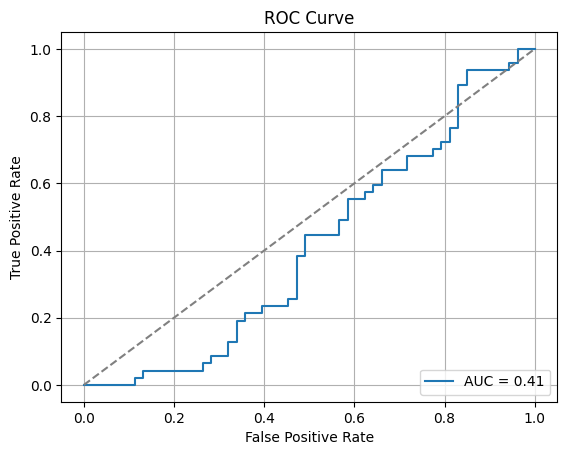

In [50]:
# Generar valores aleatorios de atributos y etiquetas de clase para la clasificación binaria
attribute_values = [random.uniform(0, 1) for _ in range(100)]
class_labels = [random.choice([0, 1]) for _ in range(100)]

# Crear objetos attribute
attribute = Attribute("Attribute", "float")
class_attr = Attribute("Class", "int")
attribute.values = attribute_values
class_attr.values = class_labels

# Trazar la curva ROC
plot_roc_curve(attribute, class_attr)


Plot para la información/correlación mutua:

In [54]:
def plot_metric_matrix(dataset):
    # Calcular la matriz métrica por pares
    correlations = calculate_pairwise_metric(dataset)

    # Obtener los nombres y valores de los atributos del conjunto de datos
    attribute_names = list(dataset.attributes.keys())

    # Create an empty matrix to store the metric values
    metric_matrix = np.zeros((len(attribute_names), len(attribute_names)))

    # Rellenar la matriz métrica con los valores de correlación
    for i in range(len(attribute_names)):
        for j in range(i + 1, len(attribute_names)):
            attr_i_name = attribute_names[i]
            attr_j_name = attribute_names[j]
            metric = correlations[(attr_i_name, attr_j_name)]
            metric_matrix[i, j] = metric
            metric_matrix[j, i] = metric

    # Crear un DataFrame a partir de la matriz métrica
    df = pd.DataFrame(metric_matrix, columns=attribute_names, index=attribute_names)

    # Trazar la matriz métrica
    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Metric Matrix')
    plt.show()


Ejemplo de uso:

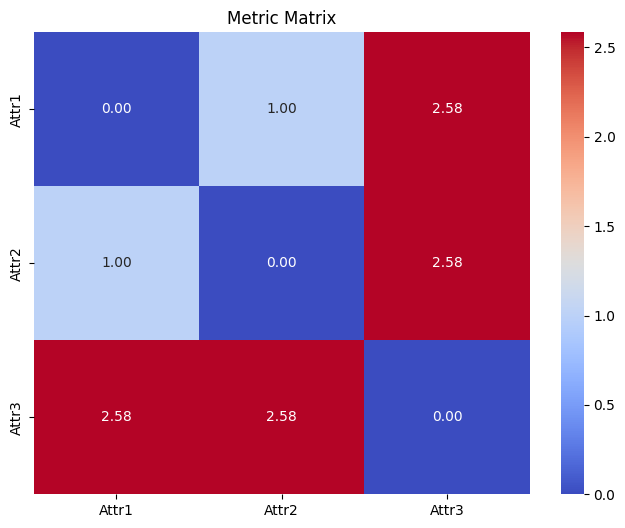

In [55]:
# Crear un dataset
dataset = Dataset("Dataset")

# Crear attributes
attr1 = Attribute("Attr1", "int")
attr1.add_value(1)
attr1.add_value(2)
attr1.add_value(3)
attr1.add_value(4)
attr1.add_value(5)
dataset.add_attribute(attr1)

attr2 = Attribute("Attr2", "float")
attr2.add_value(6.1)
attr2.add_value(7.2)
attr2.add_value(8.3)
attr2.add_value(9.4)
attr2.add_value(10.5)
dataset.add_attribute(attr2)

attr3 = Attribute("Attr3", "str")
attr3.add_value("A")
attr3.add_value("B")
attr3.add_value("C")
attr3.add_value("D")
attr3.add_value("E")
dataset.add_attribute(attr3)

dataset.set_class_attr("Attr3")

# Trazar la matriz métrica
plot_metric_matrix(dataset)
